In [1]:
# Get imports to work
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from python_scripts.dataloader import DataLoader

In [3]:
loader = DataLoader('../yolov3/multispectral', hdf5files='../../data_nas1/dronedb/data/*MultiSpectral*processed.hdf5', 
                    labels_path='../dataset_zip_files/labels/labels_05_13_20_multispectral/',
                    username='bodmer.d@northeastern.edu', password='x2HI70yuo900')

Already loaded: 3910 train, 1303 val,  1304 test


In [6]:
loader.save_from_hdf5()

['../../data_nas1/dronedb/data/DJI-Matrice-100_MultiSpectral_11-02-2020_11-AM_processed.hdf5', '1636:1636', '0\n']
['../../data_nas1/dronedb/data/DJI-Matrice-100_MultiSpectral_11-17-2020_12-PM_processed.hdf5', '1958:1958', '1\n']
['../../data_nas1/dronedb/data/DJI-Matrice-100_MultiSpectral_11-19-2020_10-AM_processed.hdf5', '1770:1770', '2\n']
['../../data_nas1/dronedb/data/Autel-EVO-II_MultiSpectral_11-17-2020_12-PM_processed.hdf5', '1157:1157', '3\n']


TypeError: expected str, bytes or os.PathLike object, not NoneType

In [7]:
loader.shuffle('../yolov3/multispectral/images/train/*.jpg', '../yolov3/multispectral/images/val/*.jpg', '../yolov3/multispectral/images/test/*.jpg')

shuffling 6517 images


../yolov3/multispectral/images/train/h5_file0_image_1539.jpg
../yolov3/multispectral/labels/train/h5_file0_image_1539.txt


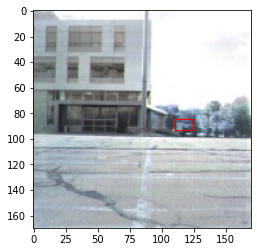

In [5]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random



image = random.choice(glob.glob('../yolov3/multispectral/images/train/h5_file0*.jpg'))
print(image)
label = image.replace('images', 'labels').replace('.jpg', '.txt')
print(label)
with open(label, 'r') as fd:
    data = fd.read()
    klass, x, y, width, height = [float(i) for i in data.strip('\n').strip(' ').split(' ') ]
    x_center = (x + (width / 2)) 
    y_center = (y + (height / 2))
    width = width
    height = height


frame = cv2.imread(image)
(h, w) = frame.shape[:2]
frame = np.flipud(frame)
# Create figure and axes
fig, ax = plt.subplots()

# Create a Rectangle patch
rect = patches.Rectangle((x * w,y * h), width * w, height * h, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
plt.imshow(frame)


In [6]:
files = glob.glob('../yolov3/multispectral/images/train/h5_file1*.jpg')
loader.write_videos(200, 'multispectral.mp4', source_images='../yolov3/multispectral/images/*/h5_file1*.jpg')

saved video
